# FINTECH BOOTCAMP - PROJECT 1
## Group 5 Notebook
---
The purpose of the project is to backtest if moving average crossover is more efficient than buy and hold strategy with SPY.

In [113]:
# Initial import all libraries and dependencies
import panel as pn
pn.extension('plotly')
import plotly.express as px
import datetime
import numpy as np
import pandas as pd
import hvplot.pandas
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

### I. DATA FETCHING AND CLEANING

In [2]:
#Define the instruments to download data of a stock/ETF .
tickers = ['SPY']

# Fetch SPY Data from 1/1/1992 until 12/31/2021.
start_date = datetime.date(1997,1,1)
end_date = datetime.date(2021,12,31)
years = round((end_date - start_date).days/365,0)

In [3]:
# User pandas_reader.data.DataReader to load the desired data. 
panel_data = data.DataReader("SPY", 'yahoo', start_date, end_date)

# Checkout the data type
type(panel_data)

pandas.core.frame.DataFrame

In [4]:
# Review data
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-01-02,74.375000,72.750000,74.375000,74.031250,2031900.0,47.419094
1997-01-03,75.125000,74.078125,74.375000,75.093750,2123200.0,48.099678
1997-01-06,75.437500,74.312500,75.093750,74.437500,1374100.0,47.679344
1997-01-07,75.468750,74.125000,74.437500,75.343750,939000.0,48.259811
1997-01-08,75.781250,74.687500,75.750000,74.687500,1802200.0,47.839443
...,...,...,...,...,...,...
2021-12-27,477.309998,472.010010,472.059998,477.260010,56808600.0,477.260010
2021-12-28,478.809998,476.059998,477.720001,476.869995,47274600.0,476.869995
2021-12-29,478.559998,475.920013,476.980011,477.480011,54503000.0,477.480011


In [5]:
# Select closing price only
price = panel_data.drop(columns = ["High", "Low", "Open", "Volume", "Adj Close"])
price.head()

,Close
Date,
1997-01-02,74.03125
1997-01-03,75.09375
1997-01-06,74.43750
1997-01-07,75.34375
1997-01-08,74.68750


In [6]:
# Describe data
price.describe()

,Close
count,6293.000000
mean,169.189590
std,83.419133
min,68.110001
25%,113.660004
50%,135.360001
75%,207.259995
max,477.480011


In [7]:
# Count nulls and drop nulls (in any)
price.isnull().sum()

Close    0
dtype: int64

In [8]:
# Check if closing price is float 
price.dtypes

Close    float64
dtype: object

### II. Analysis
Calculate total return, compound annual growth rate ('CAGR'), volatility, max drawdown ('MDD'), exposure ratio, number of trade, win rate

#### 1. Buy and Hold Strategy (benchmark)

In [9]:
# Plot stock/etf 
def chart_bm (): #bm - benchmark
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(price["Close"])
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return chart_bm
#     return pn.pane.Matplotlib(tight= True)[in case of nto shown in dashboard]

<function __main__.chart_bm()>

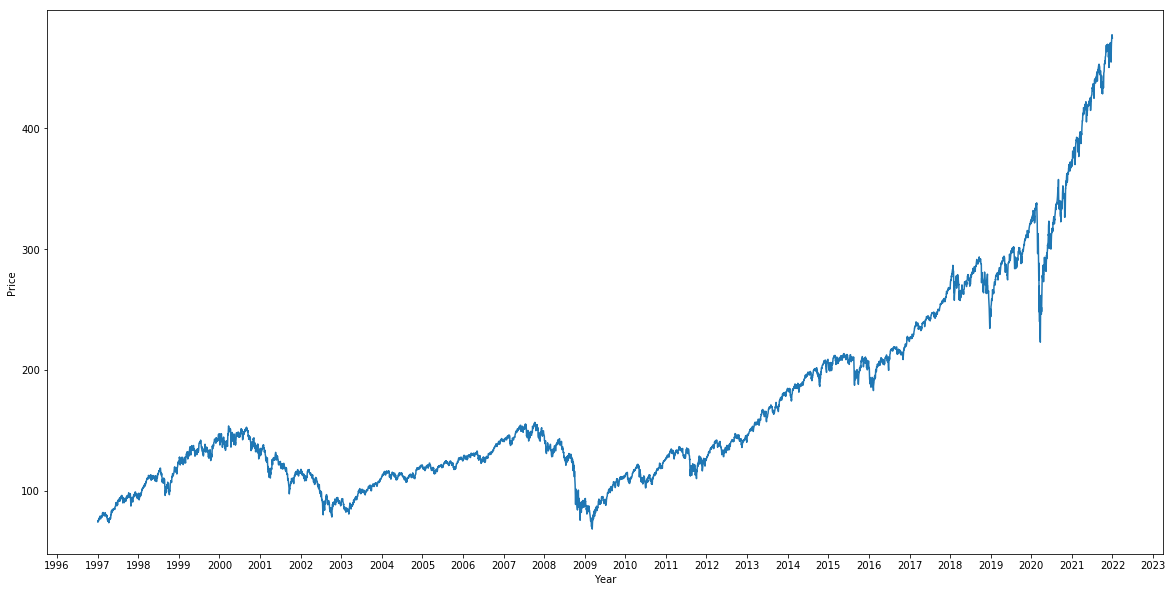

In [10]:
chart_bm()

In [11]:
# Calculate returns for SPY as a benchmark and compound annual growth rate (CAGR)
bm_daily_return = price [["Close"]]
bm_daily_return = bm_daily_return.pct_change()
bm_daily_return.rename(columns= {"Close" : "bm_daily_return"}, inplace = True)

In [12]:
# Cumulative return
bm_daily_return["bm_cumulative_return"] = (1 + bm_daily_return["bm_daily_return"]).cumprod()
bm_daily_return

,bm_daily_return,bm_cumulative_return
Date,,
1997-01-02,NaN,NaN
1997-01-03,0.014352,1.014352
1997-01-06,-0.008739,1.005488
1997-01-07,0.012175,1.017729
1997-01-08,-0.008710,1.008864
...,...,...
2021-12-27,0.014152,6.446737
2021-12-28,-0.000817,6.441469
2021-12-29,0.001279,6.449709


In [13]:
# Total return and CAGR
total_return_pct = round((bm_daily_return["bm_cumulative_return"][-1]-1)*100, 2)
cagr_pct = round((((bm_daily_return["bm_cumulative_return"][-1])**(1/years))-1)*100,2)
print(total_return_pct)
print(cagr_pct)

541.57
7.72


In [14]:
# Calculate standard deviation and sharpe ratio for SPY as a benchmark
bm_volatility_pct = round(bm_daily_return["bm_daily_return"].std()*np.sqrt(252)*100,2)
bm_volatility_pct

19.74

In [15]:
# Calculate benchmark drawdown

In [16]:
bm_daily_return["peak_cumulative"] = bm_daily_return["bm_cumulative_return"].cummax()
bm_daily_return["drawdown_pct"] = ((bm_daily_return["bm_cumulative_return"] - bm_daily_return["peak_cumulative"])/bm_daily_return["peak_cumulative"])*100

<function __main__.bm_dd()>

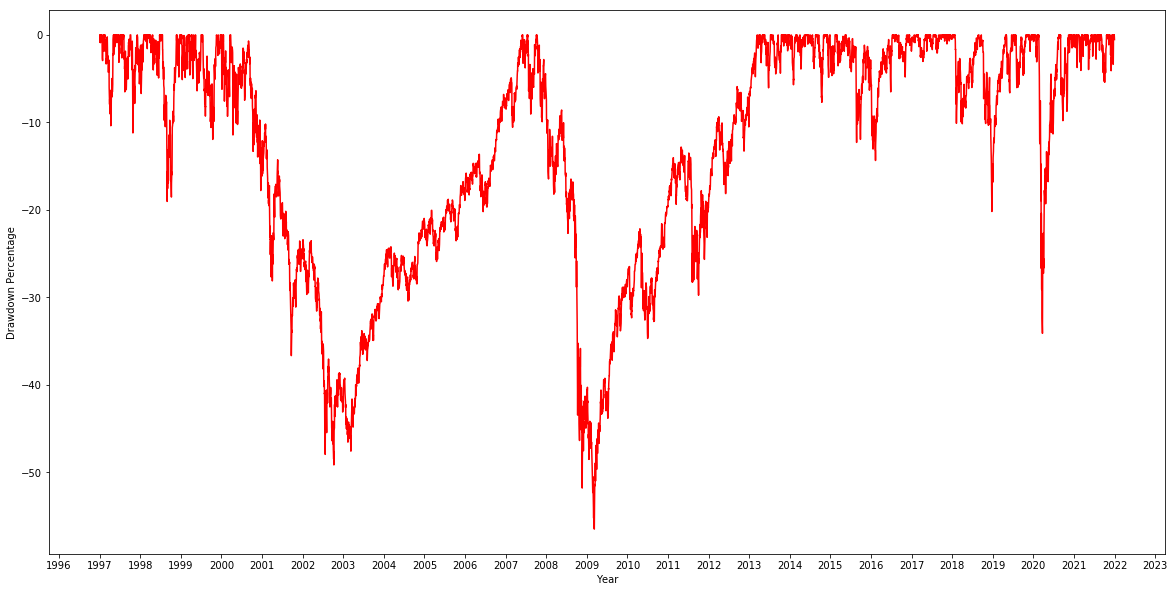

In [17]:
# Plot daily drawback - displays portfolio losses from any high point along the way

def bm_dd (): # drawdown
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(bm_daily_return["drawdown_pct"],color = "red")
    ax.set(xlabel = "Year",
    ylabel = "Drawdown Percentage")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return bm_dd
bm_dd()

In [18]:
# Calculate maximum drawdown value
bm_mdd = round(bm_daily_return["drawdown_pct"].min(),2)
bm_mdd

-56.47

In [19]:
df_summary = pd.DataFrame()
index =  ["benchmark", "strategy_1", "strategy_2", "strategy_3", "strategy_4"]
columns =  ["total_return", "cagr", "volatility", "max_drawdown", "exposure_ratio", "no_of_trade","win_rate" ]
df_summary = pd.DataFrame(columns = columns, index=index)
df_summary

,total_return,cagr,volatility,max_drawdown,exposure_ratio,no_of_trade,win_rate
benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_summary.loc["benchmark"] = pd.Series({ "total_return" : total_return_pct, "cagr" : cagr_pct, "volatility" : bm_volatility_pct, 
                                         "max_drawdown" : bm_mdd, "exposure_ratio" : 100, "no_of_trade" : 1, "win_rate": 100})
df_summary

,total_return,cagr,volatility,max_drawdown,exposure_ratio,no_of_trade,win_rate
benchmark,541.57,7.72,19.74,-56.47,100.0,1.0,100.0
strategy_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Strategy 1 - Backtesting 50 SMA crossing 200 SMA

In [21]:
fast_ma_1 = 50
slow_ma_1 = 200

In [22]:
# Calculate moving average for Strategy 1
strategy1 = price[["Close"]]
strategy1["fast_ma"] = strategy1["Close"].rolling(window = fast_ma_1).mean()
strategy1["slow_ma"] = strategy1["Close"].rolling(window = slow_ma_1).mean()
strategy1

,Close,fast_ma,slow_ma
Date,,,
1997-01-02,74.031250,NaN,NaN
1997-01-03,75.093750,NaN,NaN
1997-01-06,74.437500,NaN,NaN
1997-01-07,75.343750,NaN,NaN
1997-01-08,74.687500,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,435.577850
2021-12-28,476.869995,463.063001,435.980150
2021-12-29,477.480011,463.668801,436.388000


In [23]:
def strategy_plot (strategy,price_label, short_label, long_label):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy["Close"], label=price_label)
    ax.plot(strategy["fast_ma"], label=short_label)
    ax.plot(strategy["slow_ma"], label=long_label)
    ax.set(xlabel = "Year",
    ylabel = "Price")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.legend()
    return strategy_plot

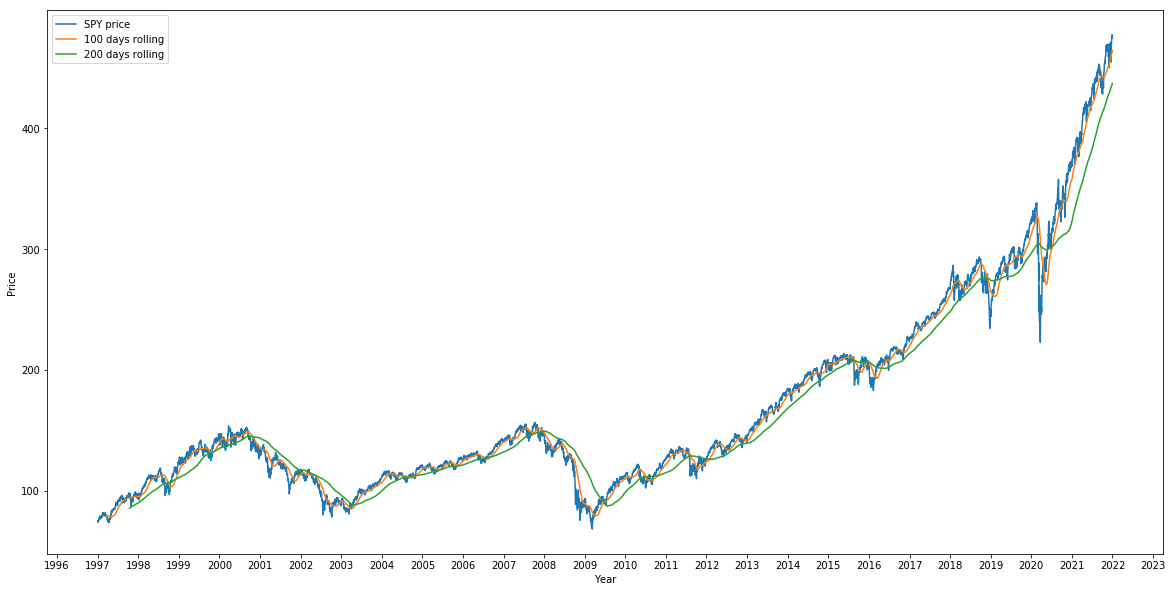

In [24]:
strategy1_plot = strategy_plot(strategy1, 'SPY price', '100 days rolling', '200 days rolling')

In [25]:
# Formulate the strategy

In [26]:
benchmark_return = bm_daily_return[["bm_daily_return"]]
strategy1_return = pd.concat([strategy1,benchmark_return],axis=1, join = "inner")
strategy1_return["long_position"] = strategy1_return['fast_ma'] > strategy1_return["slow_ma"]
strategy1_return.head()

,Close,fast_ma,slow_ma,bm_daily_return,long_position
Date,,,,,
1997-01-02,74.03125,NaN,NaN,NaN,False
1997-01-03,75.09375,NaN,NaN,0.014352,False
1997-01-06,74.43750,NaN,NaN,-0.008739,False
1997-01-07,75.34375,NaN,NaN,0.012175,False
1997-01-08,74.68750,NaN,NaN,-0.008710,False


In [27]:
strategy1_return["strategy1_return"] = np.where(strategy1_return["long_position"].shift(1) == True, strategy1_return["bm_daily_return"], 0)
strategy1_return.tail()

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy1_return
Date,,,,,,
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279
2021-12-30,476.160004,464.179201,436.782500,-0.002765,True,-0.002765
2021-12-31,474.959991,464.630201,437.199899,-0.002520,True,-0.002520


In [28]:
strategy1_return["strategy1_cumulative_return"] = (1+ strategy1_return["strategy1_return"]).cumprod()
strategy1_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy1_return,strategy1_cumulative_return
Date,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,1.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,1.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,1.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,1.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,1.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,5.129356
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,5.125164
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,5.131720


<function __main__.strategy_return_plot(bm_daily_return, strategy_return, strategy_label)>

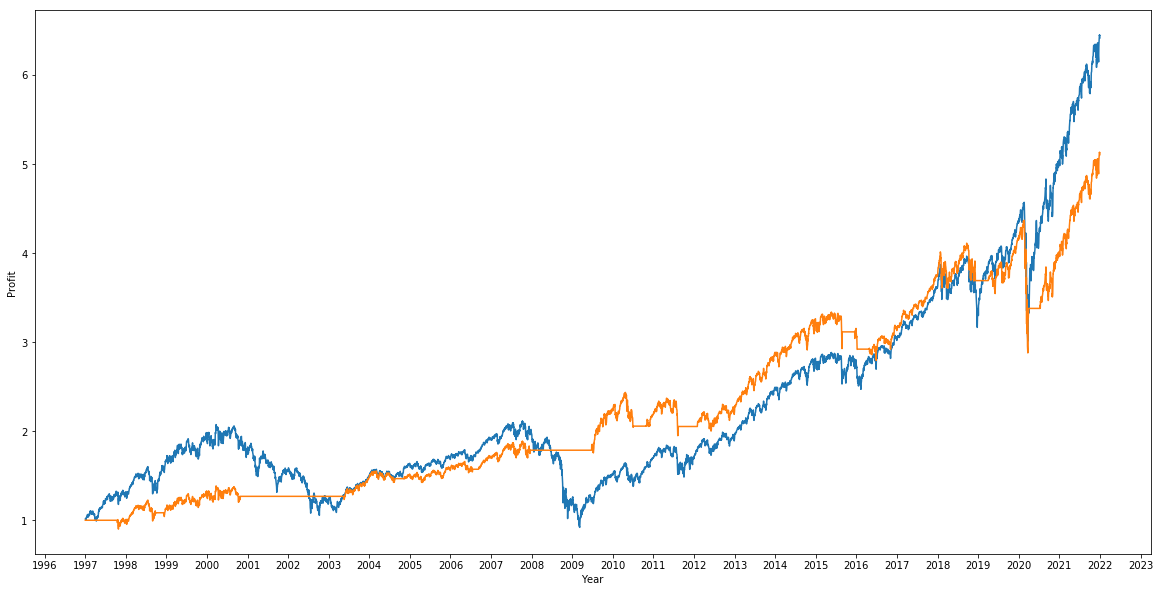

In [29]:
# Plot with the benchmark
# Create a function that can be used to plot any of the graphs based on the strategy return
def strategy_return_plot (bm_daily_return,strategy_return,strategy_label):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(bm_daily_return["bm_cumulative_return"],label="bm_cumulative_return")
    ax.plot(strategy_return[strategy_label],label=strategy_label)
    ax.set(xlabel = "Year",
    ylabel = "Profit")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy_return_plot
strategy_return_plot(bm_daily_return, strategy1_return, "strategy1_cumulative_return")

In [30]:
# Calculate strategy total return and CAGR

strategy1_total_return_pct = round((strategy1_return["strategy1_cumulative_return"][-1]-1) * 100, 2)
strategy1_cagr_pct = round((((strategy1_return["strategy1_cumulative_return"][-1])**(1/years))-1)*100,2)

In [31]:
print(strategy1_total_return_pct)

410.46


In [32]:
print(strategy1_cagr_pct)

6.74


In [33]:
# Calculate exposure ratio
strategy1_exposure_days = len(strategy1_return["strategy1_return"]) - (strategy1_return["strategy1_return"]==0).sum()
strategy1_exposure_ratio = round(strategy1_exposure_days/len(strategy1_return)*100,2)
print(strategy1_exposure_ratio)

70.28


In [34]:
# Calculate volatility
strategy1_volatility = round(strategy1_return["strategy1_return"].std()*np.sqrt(252)*100,2)
strategy1_volatility

13.71

In [35]:
# Calculate drawdown for strategy 1
strategy1_return["strategy1_peak_cumulative"]= strategy1_return["strategy1_cumulative_return"].cummax()
strategy1_return["strategy1_drawdown_pct"] = (strategy1_return["strategy1_cumulative_return"] - strategy1_return["strategy1_peak_cumulative"])/strategy1_return["strategy1_peak_cumulative"]*100
strategy1_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy1_return,strategy1_cumulative_return,strategy1_peak_cumulative,strategy1_drawdown_pct
Date,,,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,1.000000,1.000000,0.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,1.000000,1.000000,0.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,1.000000,1.000000,0.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,1.000000,1.000000,0.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,435.577850,0.014152,True,0.014152,5.129356,5.129356,0.000000
2021-12-28,476.869995,463.063001,435.980150,-0.000817,True,-0.000817,5.125164,5.129356,-0.081720
2021-12-29,477.480011,463.668801,436.388000,0.001279,True,0.001279,5.131720,5.131720,0.000000


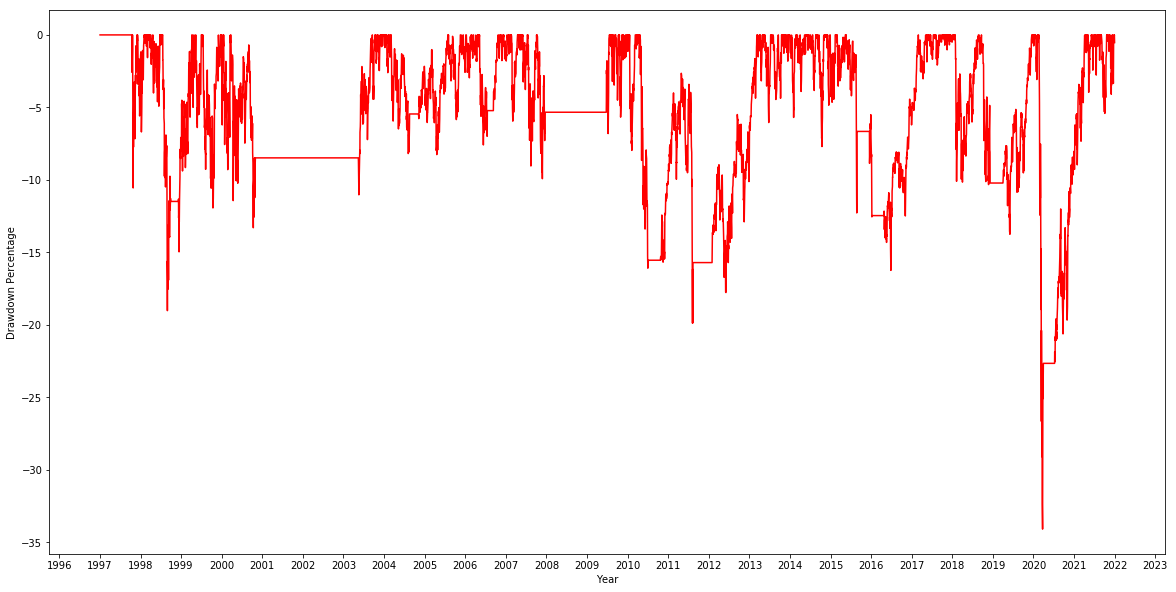

In [36]:
# Plot daily drawback - displays portfolio losses from any high point along the way
def strategy_dd (strategy_return, drawdown_label): # drawdown
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(strategy_return[drawdown_label],color = "red")
    ax.set(xlabel = "Year",
    ylabel = "Drawdown Percentage")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    return strategy_dd
strategy1_dd = strategy_dd(strategy1_return, "strategy1_drawdown_pct")

In [37]:
strategy1_mdd = round(strategy1_return["strategy1_drawdown_pct"].min(),2)
strategy1_mdd

-34.1

In [38]:
# Calculate number of trade and win rate
long_cumulative=[] # the cumulative return at every time when entering the position
for i in range(len(strategy1_return["long_position"]-1)):
    if strategy1_return["long_position"][i] == False and strategy1_return["long_position"][i+1] == True:
        long_cumulative.append(strategy1_return["strategy1_cumulative_return"][i])

In [39]:
strategy1_no_of_trade = len(long_cumulative)
print(strategy1_no_of_trade)

13


In [40]:
strategy1_win = 0
for i in range(len(long_cumulative)-1):
    if long_cumulative[i] < long_cumulative[i+1]:
        strategy1_win+=1

In [41]:
strategy1_win_rate = round(strategy1_win/strategy1_no_of_trade*100,2)
print(strategy1_win_rate)

69.23


In [42]:
# Summary of the strategy1 

In [43]:
df_summary.loc["strategy_1"] = pd.Series({ "total_return" : strategy1_total_return_pct, "cagr" : strategy1_cagr_pct, "volatility" : strategy1_volatility, 
                                           "max_drawdown" : strategy1_mdd, "exposure_ratio" : strategy1_exposure_ratio, "no_of_trade" : strategy1_no_of_trade, "win_rate": strategy1_win_rate})
df_summary

,total_return,cagr,volatility,max_drawdown,exposure_ratio,no_of_trade,win_rate
benchmark,541.57,7.72,19.74,-56.47,100.0,1.0,100.0
strategy_1,410.46,6.74,13.71,-34.1,70.28,13.0,69.23
strategy_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Stategy 2 - Backtesting 50 SMA crossing 100 SMA

In [44]:
# Define variables
fast_ma_2 = 50
slow_ma_2 = 100

In [45]:
# Calculate moving average for strategy 2

In [46]:
strategy2 = price[["Close"]]
strategy2['fast_ma'] = strategy2['Close'].rolling(window = fast_ma_2).mean()
strategy2['slow_ma'] = strategy2['Close'].rolling(window = slow_ma_2).mean()
# Observe the values
strategy2

,Close,fast_ma,slow_ma
Date,,,
1997-01-02,74.031250,NaN,NaN
1997-01-03,75.093750,NaN,NaN
1997-01-06,74.437500,NaN,NaN
1997-01-07,75.343750,NaN,NaN
1997-01-08,74.687500,NaN,NaN
...,...,...,...
2021-12-27,477.260010,462.443001,452.518901
2021-12-28,476.869995,463.063001,452.870001
2021-12-29,477.480011,463.668801,453.219901


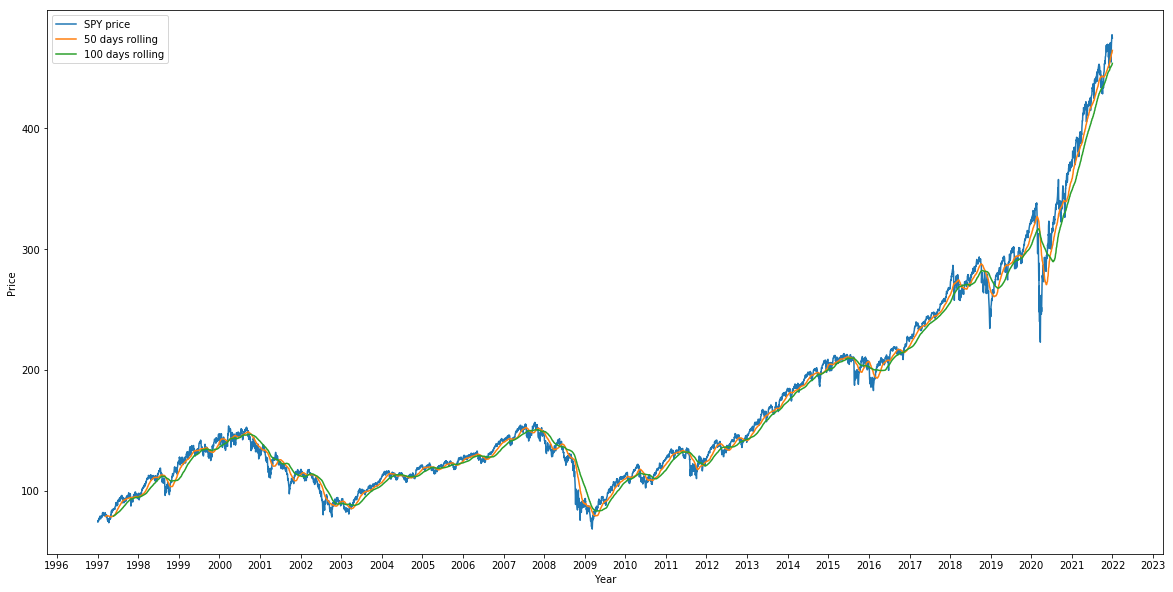

In [47]:
# Plot a graph
strategy2_plot = strategy_plot(strategy2, 'SPY price', '50 days rolling', '100 days rolling')

In [48]:
# Define entries for long position
benchmark_return = bm_daily_return[["bm_daily_return"]]
strategy2_return = pd.concat([strategy2,benchmark_return],axis=1, join = "inner")
strategy2_return["long_position"] = strategy2.fast_ma > strategy2.slow_ma
strategy2_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position
Date,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False
1997-01-03,75.093750,NaN,NaN,0.014352,False
1997-01-06,74.437500,NaN,NaN,-0.008739,False
1997-01-07,75.343750,NaN,NaN,0.012175,False
1997-01-08,74.687500,NaN,NaN,-0.008710,False
...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True
2021-12-29,477.480011,463.668801,453.219901,0.001279,True


In [49]:
# Calculate the strategy balance
# First calculate the strategy returns
strategy2_return["strategy2_return"] = np.where(strategy2_return["long_position"].shift(1) == True, strategy2_return["bm_daily_return"], 0) 
strategy2_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy2_return
Date,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000
...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True,0.014152
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True,-0.000817
2021-12-29,477.480011,463.668801,453.219901,0.001279,True,0.001279


In [50]:
# Then calculate the strategy balance using the cumulative returns
strategy2_return["strategy2_cumulative_return"] = (1+ strategy2_return["strategy2_return"]).cumprod()
strategy2_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy2_return,strategy2_cumulative_return
Date,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,1.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,1.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,1.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,1.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,1.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True,0.014152,3.321647
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True,-0.000817,3.318933
2021-12-29,477.480011,463.668801,453.219901,0.001279,True,0.001279,3.323178


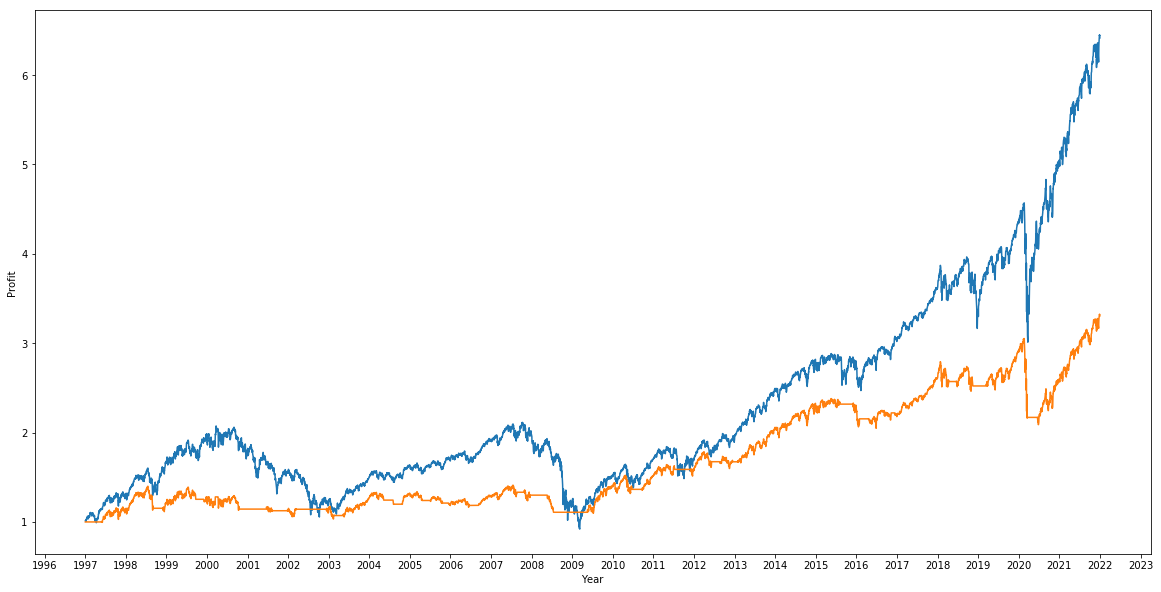

In [51]:
# Plot with the benchmark
strategy2 = strategy_return_plot(bm_daily_return, strategy2_return, "strategy2_cumulative_return")

In [52]:
# Calculate strategy total return and CAGR

strategy2_total_return_pct = round((strategy2_return["strategy2_cumulative_return"][-1]-1) * 100, 2)
strategy2_cagr_pct = round((((strategy2_return["strategy2_cumulative_return"][-1])**(1/years))-1)*100,2)

In [53]:
print(strategy2_total_return_pct)

230.56


In [54]:
print(strategy2_cagr_pct)

4.9


In [55]:
# Calculate exposure ratio
strategy2_exposure_days = len(strategy2_return["strategy2_return"]) - (strategy2_return["strategy2_return"]==0).sum()
strategy2_exposure_ratio = round(strategy2_exposure_days/len(strategy2_return)*100,2)
print(strategy2_exposure_ratio)

68.97


In [56]:
# Calculate volatility
strategy2_volatility = round(strategy2_return["strategy2_return"].std()*np.sqrt(252)*100,2)
strategy2_volatility

13.34

In [57]:
# Calculate drawdown for strategy 1
strategy2_return["strategy2_peak_cumulative"]= strategy2_return["strategy2_cumulative_return"].cummax()
strategy2_return["strategy2_drawdown_pct"] = (strategy2_return["strategy2_cumulative_return"] - strategy2_return["strategy2_peak_cumulative"])/strategy2_return["strategy2_peak_cumulative"]*100
strategy2_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy2_return,strategy2_cumulative_return,strategy2_peak_cumulative,strategy2_drawdown_pct
Date,,,,,,,,,
1997-01-02,74.031250,NaN,NaN,NaN,False,0.000000,1.000000,1.000000,0.000000
1997-01-03,75.093750,NaN,NaN,0.014352,False,0.000000,1.000000,1.000000,0.000000
1997-01-06,74.437500,NaN,NaN,-0.008739,False,0.000000,1.000000,1.000000,0.000000
1997-01-07,75.343750,NaN,NaN,0.012175,False,0.000000,1.000000,1.000000,0.000000
1997-01-08,74.687500,NaN,NaN,-0.008710,False,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2021-12-27,477.260010,462.443001,452.518901,0.014152,True,0.014152,3.321647,3.321647,0.000000
2021-12-28,476.869995,463.063001,452.870001,-0.000817,True,-0.000817,3.318933,3.321647,-0.081720
2021-12-29,477.480011,463.668801,453.219901,0.001279,True,0.001279,3.323178,3.323178,0.000000


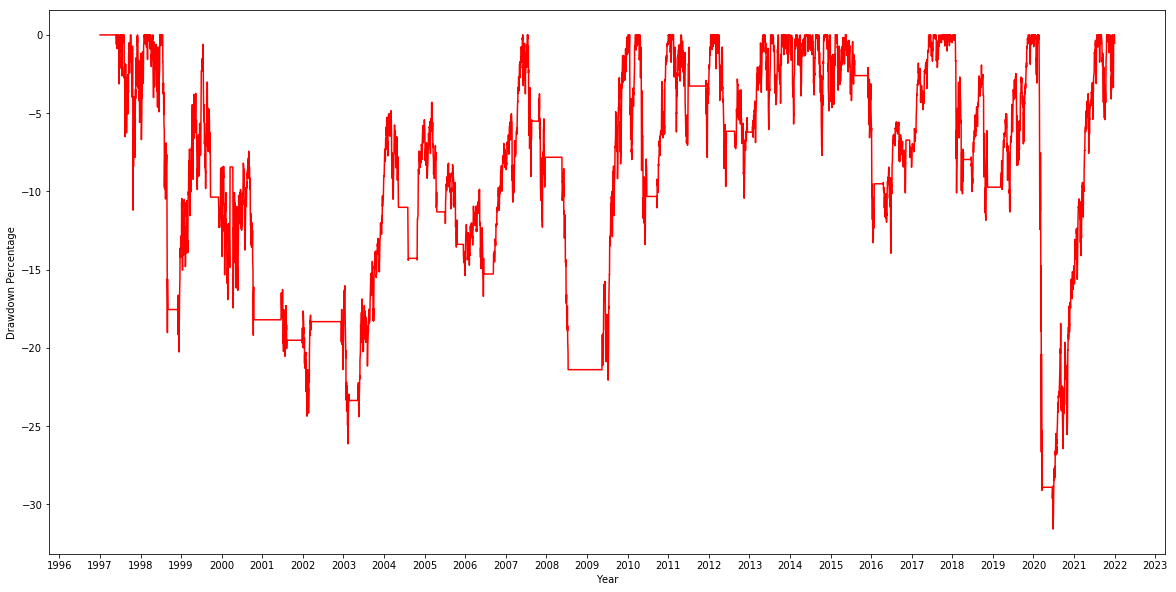

In [58]:
# Plot daily drawback - displays portfolio losses from any high point along the way
strategy2_dd = strategy_dd(strategy2_return, "strategy2_drawdown_pct")

In [59]:
strategy2_mdd = round(strategy2_return["strategy2_drawdown_pct"].min(),2)
strategy2_mdd

-31.59

In [60]:
# Calculate number of trade and win rate
long_cumulative=[] # the cumulative return at every time when entering the position
for i in range(len(strategy2_return["long_position"]-1)):
    if strategy2_return["long_position"][i] == False and strategy2_return["long_position"][i+1] == True:
        long_cumulative.append(strategy2_return["strategy2_cumulative_return"][i])

In [61]:
strategy2_no_of_trade = len(long_cumulative)
print(strategy2_no_of_trade)

26


In [62]:
strategy2_win = 0
for i in range(len(long_cumulative)-1):
    if long_cumulative[i] < long_cumulative[i+1]:
        strategy2_win+=1

In [63]:
strategy2_win_rate = round(strategy2_win/strategy2_no_of_trade*100,2)
print(strategy2_win_rate)

50.0


In [64]:
# Summary of the strategy 2 

In [65]:
df_summary.loc["strategy_2"] = pd.Series({ "total_return" : strategy2_total_return_pct, "cagr" : strategy2_cagr_pct, "volatility" : strategy2_volatility, 
                                           "max_drawdown" : strategy2_mdd, "exposure_ratio" : strategy2_exposure_ratio, "no_of_trade" : strategy2_no_of_trade, "win_rate": strategy2_win_rate})
df_summary

,total_return,cagr,volatility,max_drawdown,exposure_ratio,no_of_trade,win_rate
benchmark,541.57,7.72,19.74,-56.47,100.0,1.0,100.0
strategy_1,410.46,6.74,13.71,-34.1,70.28,13.0,69.23
strategy_2,230.56,4.9,13.34,-31.59,68.97,26.0,50.0
strategy_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
strategy_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Strategy 3 - Backtesting 20 EMA crossing 50 SMA 

In [66]:
# Define variables
fast_ma_3 = 20
slow_ma_3 = 50

In [67]:
# Calculate moving average for strategy 3

In [68]:
strategy3 = price[["Close"]]
strategy3['fast_ma'] = strategy3['Close'].ewm(span = fast_ma_3, adjust = False).mean()
strategy3['slow_ma'] = strategy3['Close'].rolling(window = slow_ma_3).mean()
strategy3

,Close,fast_ma,slow_ma
Date,,,
1997-01-02,74.031250,74.031250,NaN
1997-01-03,75.093750,74.132440,NaN
1997-01-06,74.437500,74.161494,NaN
1997-01-07,75.343750,74.274090,NaN
1997-01-08,74.687500,74.313462,NaN
...,...,...,...
2021-12-27,477.260010,465.494746,462.443001
2021-12-28,476.869995,466.578103,463.063001
2021-12-29,477.480011,467.616380,463.668801


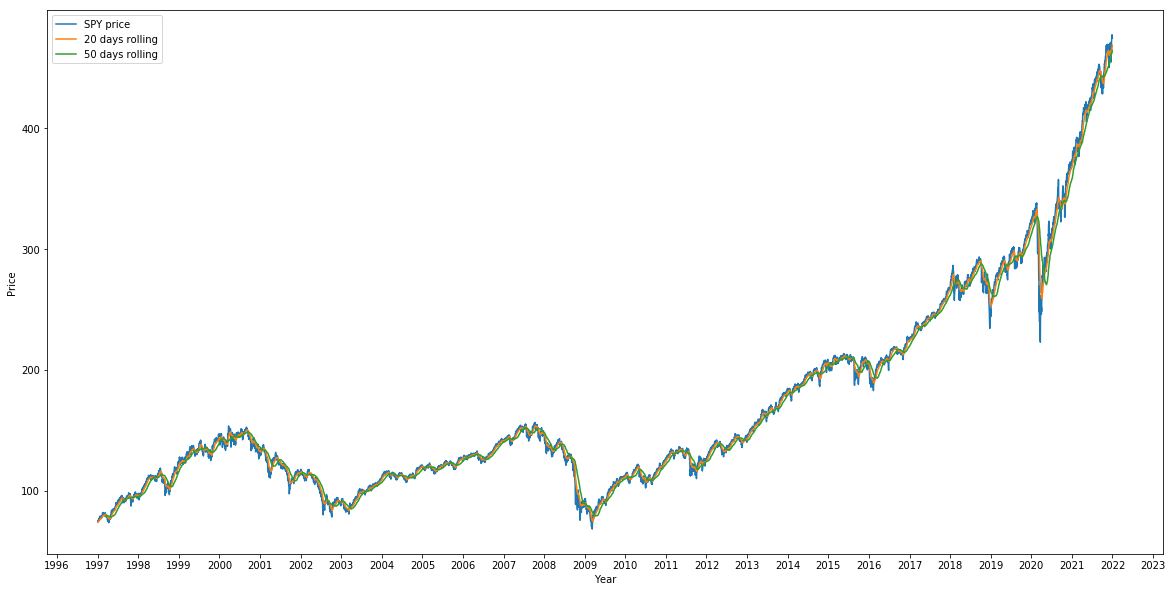

In [69]:
# Plot a graph
strategy3_plot = strategy_plot(strategy3, 'SPY price', '20 days rolling', '50 days rolling')

In [70]:
# Define entries for long position
benchmark_return = bm_daily_return[["bm_daily_return"]]
strategy3_return = pd.concat([strategy3,benchmark_return],axis=1, join = "inner")
strategy3_return["long_position"] = strategy3.fast_ma > strategy3.slow_ma
strategy3_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position
Date,,,,,
1997-01-02,74.031250,74.031250,NaN,NaN,False
1997-01-03,75.093750,74.132440,NaN,0.014352,False
1997-01-06,74.437500,74.161494,NaN,-0.008739,False
1997-01-07,75.343750,74.274090,NaN,0.012175,False
1997-01-08,74.687500,74.313462,NaN,-0.008710,False
...,...,...,...,...,...
2021-12-27,477.260010,465.494746,462.443001,0.014152,True
2021-12-28,476.869995,466.578103,463.063001,-0.000817,True
2021-12-29,477.480011,467.616380,463.668801,0.001279,True


In [71]:
# Calculate the strategy balance
# First calculate the strategy returns
strategy3_return["strategy3_return"] = np.where(strategy3_return["long_position"].shift(1) == True, strategy3_return["bm_daily_return"], 0) 
strategy3_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy3_return
Date,,,,,,
1997-01-02,74.031250,74.031250,NaN,NaN,False,0.000000
1997-01-03,75.093750,74.132440,NaN,0.014352,False,0.000000
1997-01-06,74.437500,74.161494,NaN,-0.008739,False,0.000000
1997-01-07,75.343750,74.274090,NaN,0.012175,False,0.000000
1997-01-08,74.687500,74.313462,NaN,-0.008710,False,0.000000
...,...,...,...,...,...,...
2021-12-27,477.260010,465.494746,462.443001,0.014152,True,0.014152
2021-12-28,476.869995,466.578103,463.063001,-0.000817,True,-0.000817
2021-12-29,477.480011,467.616380,463.668801,0.001279,True,0.001279


In [72]:
# Then calculate the strategy balance using the cumulative returns
strategy3_return["strategy3_cumulative_return"] = (1+ strategy3_return["strategy3_return"]).cumprod()
strategy3_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy3_return,strategy3_cumulative_return
Date,,,,,,,
1997-01-02,74.031250,74.031250,NaN,NaN,False,0.000000,1.000000
1997-01-03,75.093750,74.132440,NaN,0.014352,False,0.000000,1.000000
1997-01-06,74.437500,74.161494,NaN,-0.008739,False,0.000000,1.000000
1997-01-07,75.343750,74.274090,NaN,0.012175,False,0.000000,1.000000
1997-01-08,74.687500,74.313462,NaN,-0.008710,False,0.000000,1.000000
...,...,...,...,...,...,...,...
2021-12-27,477.260010,465.494746,462.443001,0.014152,True,0.014152,2.091026
2021-12-28,476.869995,466.578103,463.063001,-0.000817,True,-0.000817,2.089318
2021-12-29,477.480011,467.616380,463.668801,0.001279,True,0.001279,2.091990


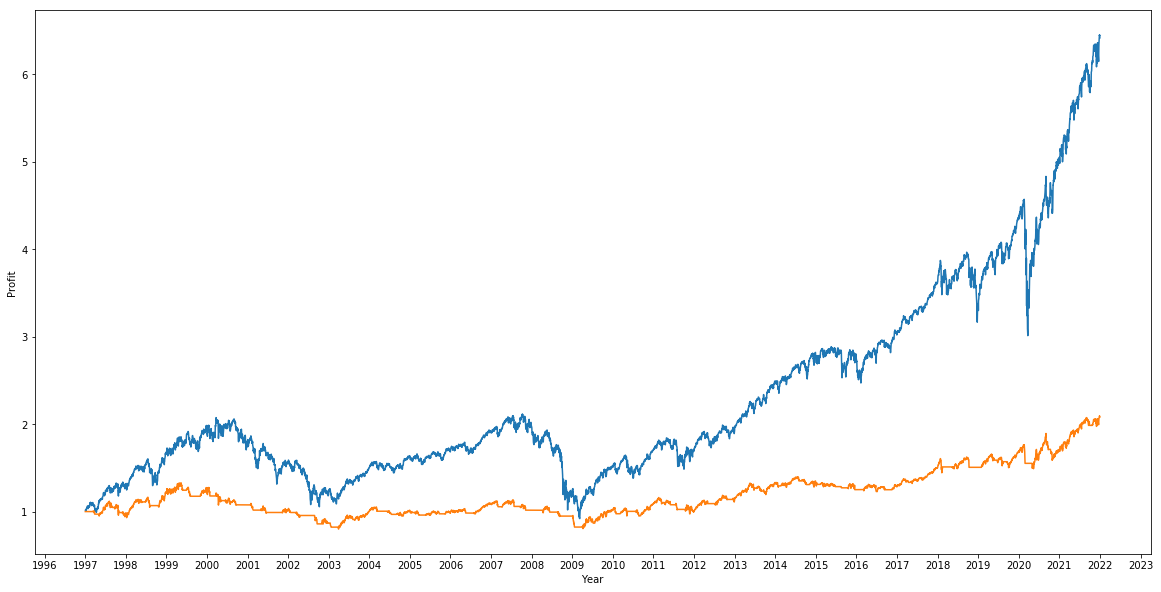

In [73]:
# Plot with the benchmark
strategy3 = strategy_return_plot(bm_daily_return, strategy3_return, "strategy3_cumulative_return")

In [74]:
# Calculate strategy total return and CAGR

strategy3_total_return_pct = round((strategy3_return["strategy3_cumulative_return"][-1]-1) * 100, 2)
strategy3_cagr_pct = round((((strategy3_return["strategy3_cumulative_return"][-1])**(1/years))-1)*100,2)

In [75]:
print(strategy3_total_return_pct)

108.09


In [76]:
print(strategy3_cagr_pct)

2.97


In [77]:
# Calculate exposure ratio
strategy3_exposure_days = len(strategy3_return["strategy3_return"]) - (strategy3_return["strategy3_return"]==0).sum()
strategy3_exposure_ratio = round(strategy3_exposure_days/len(strategy3_return)*100,2)
print(strategy3_exposure_ratio)

65.01


In [78]:
# Calculate volatility
strategy3_volatility = round(strategy3_return["strategy3_return"].std()*np.sqrt(252)*100,2)
strategy3_volatility

11.77

In [79]:
# Calculate drawdown for strategy 3
strategy3_return["strategy3_peak_cumulative"]= strategy3_return["strategy3_cumulative_return"].cummax()
strategy3_return["strategy3_drawdown_pct"] = (strategy3_return["strategy3_cumulative_return"] - strategy3_return["strategy3_peak_cumulative"])/strategy3_return["strategy3_peak_cumulative"]*100
strategy3_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy3_return,strategy3_cumulative_return,strategy3_peak_cumulative,strategy3_drawdown_pct
Date,,,,,,,,,
1997-01-02,74.031250,74.031250,NaN,NaN,False,0.000000,1.000000,1.000000,0.000000
1997-01-03,75.093750,74.132440,NaN,0.014352,False,0.000000,1.000000,1.000000,0.000000
1997-01-06,74.437500,74.161494,NaN,-0.008739,False,0.000000,1.000000,1.000000,0.000000
1997-01-07,75.343750,74.274090,NaN,0.012175,False,0.000000,1.000000,1.000000,0.000000
1997-01-08,74.687500,74.313462,NaN,-0.008710,False,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2021-12-27,477.260010,465.494746,462.443001,0.014152,True,0.014152,2.091026,2.091026,0.000000
2021-12-28,476.869995,466.578103,463.063001,-0.000817,True,-0.000817,2.089318,2.091026,-0.081720
2021-12-29,477.480011,467.616380,463.668801,0.001279,True,0.001279,2.091990,2.091990,0.000000


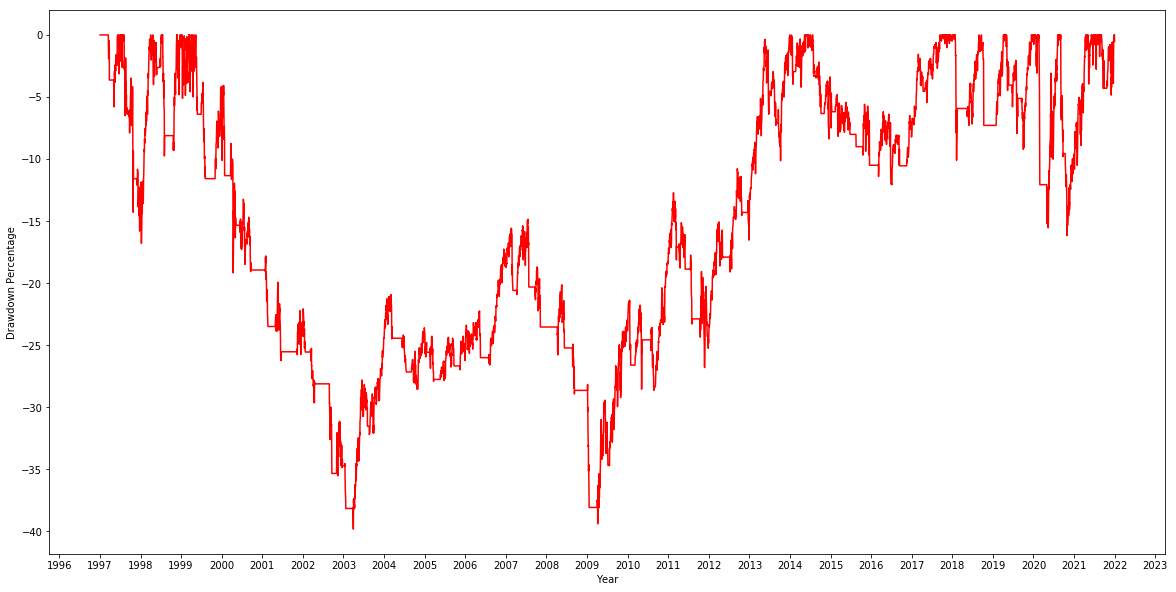

In [80]:
# Plot daily drawback - displays portfolio losses from any high point along the way
strategy3_dd = strategy_dd(strategy3_return, "strategy3_drawdown_pct")

In [81]:
strategy3_mdd = round(strategy3_return["strategy3_drawdown_pct"].min(),2)
strategy3_mdd

-39.83

In [82]:
# Calculate number of trade and win rate
long_cumulative=[] # the cumulative return at every time when entering the position
for i in range(len(strategy3_return["long_position"]-1)):
    if strategy3_return["long_position"][i] == False and strategy3_return["long_position"][i+1] == True:
        long_cumulative.append(strategy3_return["strategy3_cumulative_return"][i])

In [83]:
strategy3_no_of_trade = len(long_cumulative)
print(strategy3_no_of_trade)

70


In [84]:
strategy3_win = 0
for i in range(len(long_cumulative)-1):
    if long_cumulative[i] < long_cumulative[i+1]:
        strategy3_win+=1

In [85]:
strategy3_win_rate = round(strategy3_win/strategy3_no_of_trade*100,2)
print(strategy3_win_rate)

45.71


In [86]:
# Summary of the strategy 3 

In [87]:
df_summary.loc["strategy_3"] = pd.Series({ "total_return" : strategy3_total_return_pct, "cagr" : strategy3_cagr_pct, "volatility" : strategy3_volatility, 
                                           "max_drawdown" : strategy3_mdd, "exposure_ratio" : strategy3_exposure_ratio, "no_of_trade" : strategy3_no_of_trade, 
                                          "win_rate": strategy3_win_rate})
df_summary

,total_return,cagr,volatility,max_drawdown,exposure_ratio,no_of_trade,win_rate
benchmark,541.57,7.72,19.74,-56.47,100.0,1.0,100.0
strategy_1,410.46,6.74,13.71,-34.1,70.28,13.0,69.23
strategy_2,230.56,4.9,13.34,-31.59,68.97,26.0,50.0
strategy_3,108.09,2.97,11.77,-39.83,65.01,70.0,45.71
strategy_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4. Strategy 4 - Backtesting 11 EMA crossing the 49 EMA

In [88]:
# Define variables
fast_ma_4 = 11
slow_ma_4 = 49

In [89]:
# Calculate moving average for strategy 4

In [90]:
strategy4 = price[["Close"]]
strategy4['fast_ma'] = strategy4['Close'].ewm(span = fast_ma_4, adjust = False).mean()
strategy4['slow_ma'] = strategy4["Close"].ewm(span=slow_ma_4, adjust=False).mean()
strategy4

,Close,fast_ma,slow_ma
Date,,,
1997-01-02,74.031250,74.031250,74.031250
1997-01-03,75.093750,74.208333,74.073750
1997-01-06,74.437500,74.246528,74.088300
1997-01-07,75.343750,74.429398,74.138518
1997-01-08,74.687500,74.472415,74.160477
...,...,...,...
2021-12-27,477.260010,467.028641,460.923694
2021-12-28,476.869995,468.668866,461.561546
2021-12-29,477.480011,470.137390,462.198284


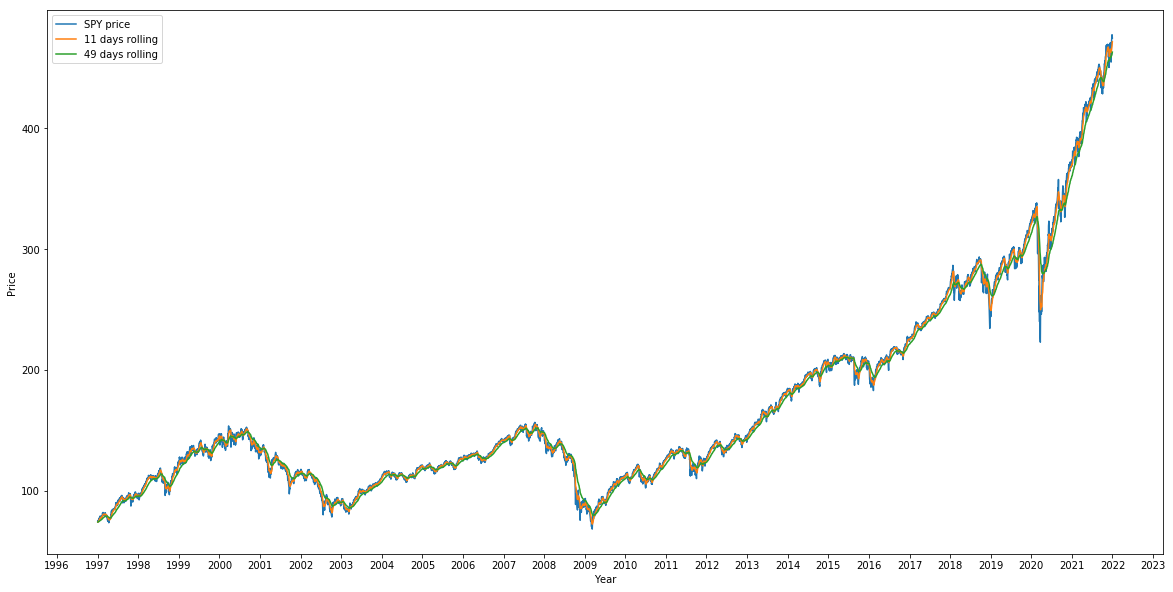

In [91]:
# Plot a graph
strategy4_plot = strategy_plot(strategy4, 'SPY price', '11 days rolling', '49 days rolling')

In [92]:
# Define entries for long position
benchmark_return = bm_daily_return[["bm_daily_return"]]
strategy4_return = pd.concat([strategy4,benchmark_return],axis=1, join = "inner")
strategy4_return["long_position"] = strategy4.fast_ma > strategy4.slow_ma
strategy4_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position
Date,,,,,
1997-01-02,74.031250,74.031250,74.031250,NaN,False
1997-01-03,75.093750,74.208333,74.073750,0.014352,True
1997-01-06,74.437500,74.246528,74.088300,-0.008739,True
1997-01-07,75.343750,74.429398,74.138518,0.012175,True
1997-01-08,74.687500,74.472415,74.160477,-0.008710,True
...,...,...,...,...,...
2021-12-27,477.260010,467.028641,460.923694,0.014152,True
2021-12-28,476.869995,468.668866,461.561546,-0.000817,True
2021-12-29,477.480011,470.137390,462.198284,0.001279,True


In [93]:
# Calculate the strategy balance
# First calculate the strategy returns
strategy4_return["strategy4_return"] = np.where(strategy4_return["long_position"].shift(1) == True, strategy4_return["bm_daily_return"], 0) 
strategy4_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy4_return
Date,,,,,,
1997-01-02,74.031250,74.031250,74.031250,NaN,False,0.000000
1997-01-03,75.093750,74.208333,74.073750,0.014352,True,0.000000
1997-01-06,74.437500,74.246528,74.088300,-0.008739,True,-0.008739
1997-01-07,75.343750,74.429398,74.138518,0.012175,True,0.012175
1997-01-08,74.687500,74.472415,74.160477,-0.008710,True,-0.008710
...,...,...,...,...,...,...
2021-12-27,477.260010,467.028641,460.923694,0.014152,True,0.014152
2021-12-28,476.869995,468.668866,461.561546,-0.000817,True,-0.000817
2021-12-29,477.480011,470.137390,462.198284,0.001279,True,0.001279


In [94]:
# Then calculate the strategy balance using the cumulative returns
strategy4_return["strategy4_cumulative_return"] = (1+ strategy4_return["strategy4_return"]).cumprod()
strategy4_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy4_return,strategy4_cumulative_return
Date,,,,,,,
1997-01-02,74.031250,74.031250,74.031250,NaN,False,0.000000,1.000000
1997-01-03,75.093750,74.208333,74.073750,0.014352,True,0.000000,1.000000
1997-01-06,74.437500,74.246528,74.088300,-0.008739,True,-0.008739,0.991261
1997-01-07,75.343750,74.429398,74.138518,0.012175,True,0.012175,1.003329
1997-01-08,74.687500,74.472415,74.160477,-0.008710,True,-0.008710,0.994590
...,...,...,...,...,...,...,...
2021-12-27,477.260010,467.028641,460.923694,0.014152,True,0.014152,3.304636
2021-12-28,476.869995,468.668866,461.561546,-0.000817,True,-0.000817,3.301936
2021-12-29,477.480011,470.137390,462.198284,0.001279,True,0.001279,3.306159


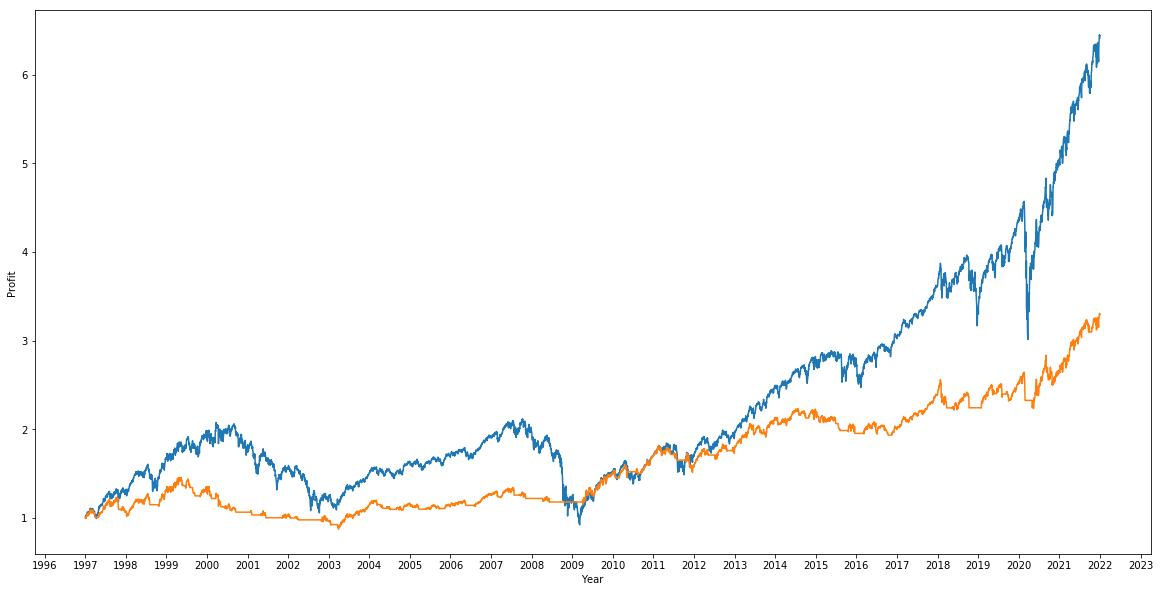

In [95]:
# Plot with the benchmark
strategy4 = strategy_return_plot(bm_daily_return, strategy4_return, "strategy4_cumulative_return")

In [96]:
# Calculate strategy total return and CAGR
strategy4_total_return_pct = round((strategy4_return["strategy4_cumulative_return"][-1]-1) * 100, 2)
strategy4_cagr_pct = round((((strategy4_return["strategy4_cumulative_return"][-1])**(1/years))-1)*100,2)

In [97]:
print(strategy4_total_return_pct)

228.87


In [98]:
print(strategy4_cagr_pct)

4.88


In [99]:
# Calculate exposure ratio
strategy4_exposure_days = len(strategy4_return["strategy4_return"]) - (strategy4_return["strategy4_return"]==0).sum()
strategy4_exposure_ratio = round(strategy4_exposure_days/len(strategy4_return)*100,2)
print(strategy4_exposure_ratio)

68.6


In [100]:
# Calculate volatility
strategy4_volatility = round(strategy4_return["strategy4_return"].std()*np.sqrt(252)*100,2)
strategy4_volatility

11.77

In [101]:
# Calculate drawdown for strategy 3
strategy4_return["strategy4_peak_cumulative"]= strategy4_return["strategy4_cumulative_return"].cummax()
strategy4_return["strategy4_drawdown_pct"] = (strategy4_return["strategy4_cumulative_return"] - strategy4_return["strategy4_peak_cumulative"])/strategy4_return["strategy4_peak_cumulative"]*100
strategy4_return

,Close,fast_ma,slow_ma,bm_daily_return,long_position,strategy4_return,strategy4_cumulative_return,strategy4_peak_cumulative,strategy4_drawdown_pct
Date,,,,,,,,,
1997-01-02,74.031250,74.031250,74.031250,NaN,False,0.000000,1.000000,1.000000,0.000000
1997-01-03,75.093750,74.208333,74.073750,0.014352,True,0.000000,1.000000,1.000000,0.000000
1997-01-06,74.437500,74.246528,74.088300,-0.008739,True,-0.008739,0.991261,1.000000,-0.873908
1997-01-07,75.343750,74.429398,74.138518,0.012175,True,0.012175,1.003329,1.003329,0.000000
1997-01-08,74.687500,74.472415,74.160477,-0.008710,True,-0.008710,0.994590,1.003329,-0.871008
...,...,...,...,...,...,...,...,...,...
2021-12-27,477.260010,467.028641,460.923694,0.014152,True,0.014152,3.304636,3.304636,0.000000
2021-12-28,476.869995,468.668866,461.561546,-0.000817,True,-0.000817,3.301936,3.304636,-0.081720
2021-12-29,477.480011,470.137390,462.198284,0.001279,True,0.001279,3.306159,3.306159,0.000000


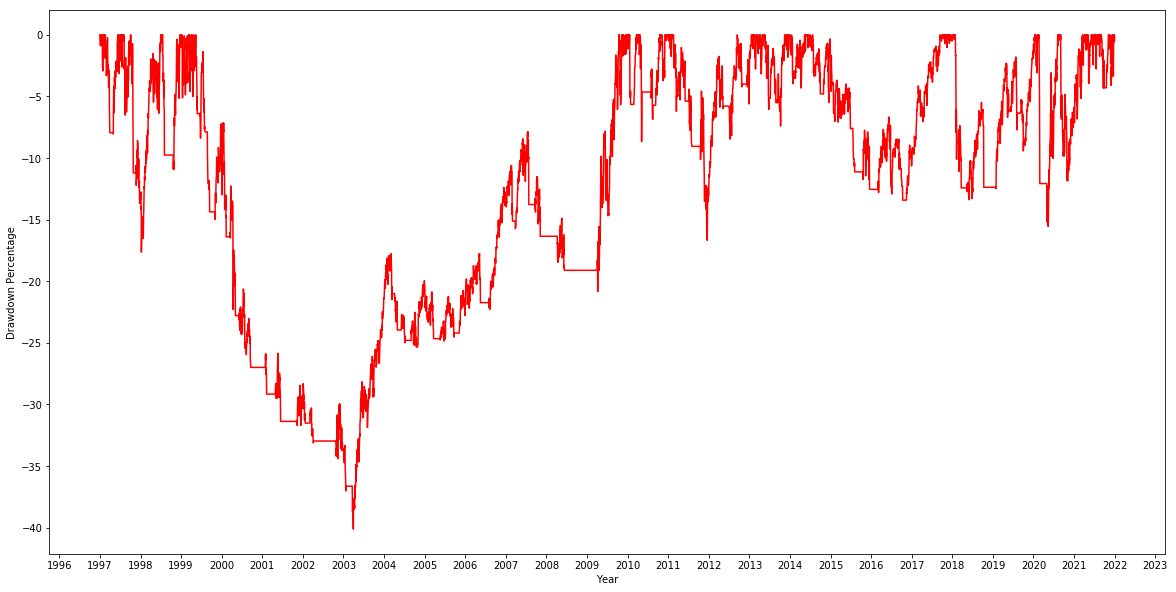

In [102]:
# Plot daily drawback - displays portfolio losses from any high point along the way
strategy4_dd = strategy_dd(strategy4_return, "strategy4_drawdown_pct")

In [103]:
strategy4_mdd = round(strategy4_return["strategy4_drawdown_pct"].min(),2)
strategy4_mdd

-40.12

In [104]:
# Calculate number of trade and win rate
long_cumulative=[] # the cumulative return at every time when entering the position
for i in range(len(strategy4_return["long_position"]-1)):
    if strategy4_return["long_position"][i] == False and strategy4_return["long_position"][i+1] == True:
        long_cumulative.append(strategy4_return["strategy4_cumulative_return"][i])

In [105]:
strategy4_no_of_trade = len(long_cumulative)
print(strategy4_no_of_trade)

73


In [106]:
strategy4_win = 0
for i in range(len(long_cumulative)-1):
    if long_cumulative[i] < long_cumulative[i+1]:
        strategy4_win+=1

In [107]:
strategy4_win_rate = round(strategy4_win/strategy4_no_of_trade*100,2)
print(strategy4_win_rate)

38.36


In [108]:
# Summary of the strategy 3

In [109]:
df_summary.loc["strategy_4"] = pd.Series({ "total_return" : strategy4_total_return_pct, "cagr" : strategy4_cagr_pct, "volatility" : strategy4_volatility, 
                                           "max_drawdown" : strategy4_mdd, "exposure_ratio" : strategy4_exposure_ratio, "no_of_trade" : strategy4_no_of_trade, 
                                          "win_rate": strategy4_win_rate})
df_summary

,total_return,cagr,volatility,max_drawdown,exposure_ratio,no_of_trade,win_rate
benchmark,541.57,7.72,19.74,-56.47,100.0,1.0,100.0
strategy_1,410.46,6.74,13.71,-34.1,70.28,13.0,69.23
strategy_2,230.56,4.9,13.34,-31.59,68.97,26.0,50.0
strategy_3,108.09,2.97,11.77,-39.83,65.01,70.0,45.71
strategy_4,228.87,4.88,11.77,-40.12,68.6,73.0,38.36


## IV. COMPARISON AMONG DIFFERENT STRATEGIES [DASHBOARD]

ValueError: cannot find widget or abbreviation for argument: 'bm_daily_return'

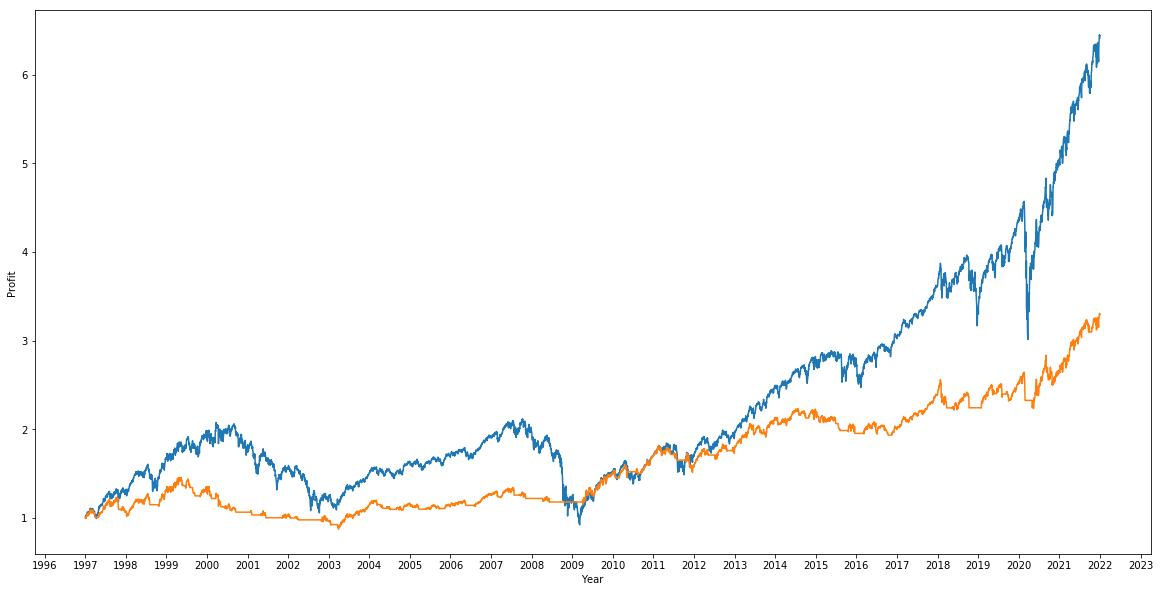

In [111]:
# Create a Title for the Dashboard
title = "# Performance of different trading strategies"
# Create a Title for the Dashboard
welcome=pn.Column(title,strategy_return_plot(bm_daily_return, strategy4_return, "strategy4_cumulative_return"))

## V. CONCLUSION AND RECOMMENDATIONS